In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


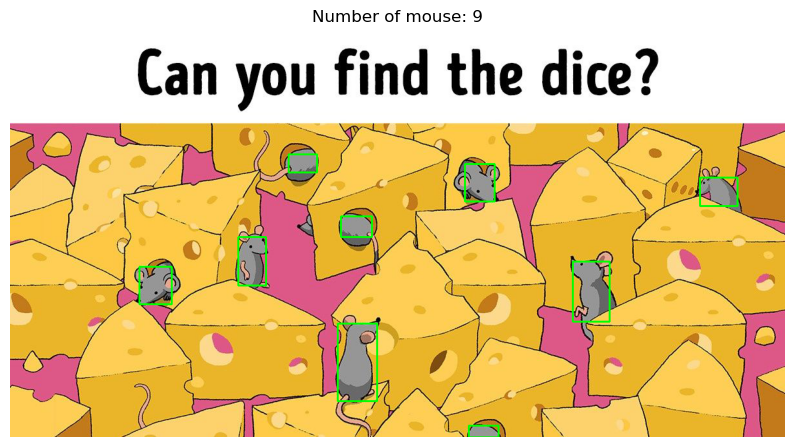

Number of mouse found: 9


In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Non-Maximum Suppression (NMS) function
def non_max_suppression(boxes, overlapThresh):
    if len(boxes) == 0:
        return []
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    pick = []
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(y2)
    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        overlap = (w * h) / area[idxs[:last]]
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))
    return boxes[pick].astype("int")

# Read the image
mouse = cv2.imread('mouse.jpg')

# Convert to HSV color space
hsv = cv2.cvtColor(mouse, cv2.COLOR_BGR2HSV)

# Define the color range for the mouse (assume the mouse is gray)
lower_gray = np.array([0, 0, 100])
upper_gray = np.array([180, 30, 200])
mask = cv2.inRange(hsv, lower_gray, upper_gray)

# Apply morphological operations to remove noise
kernel = np.ones((5,5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area to remove small objects
min_area = 100
valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Create bounding boxes from contours
boxes = []
for cnt in valid_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    boxes.append([x, y, x + w, y + h])

# Convert boxes to numpy array for NMS
boxes = np.array(boxes)

# Apply Non-Maximum Suppression
nms_boxes = non_max_suppression(boxes, overlapThresh=0.3)

# Draw rectangles and count the remaining boxes after NMS
for (x1, y1, x2, y2) in nms_boxes:
    cv2.rectangle(mouse, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the result
mouse_count = len(nms_boxes)
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(mouse, cv2.COLOR_BGR2RGB))
plt.title(f'Number of mouse: {mouse_count}')
plt.axis('off')
plt.show()

print(f"Number of mouse found: {mouse_count}")
